# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [3]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [23]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.0347 - acc: 0.2541 - val_loss: 1.9045 - val_acc: 0.3056
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8213 - acc: 0.3404 - val_loss: 1.9629 - val_acc: 0.2835
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7581 - acc: 0.3658 - val_loss: 1.8027 - val_acc: 0.3486
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7367 - acc: 0.3783 - val_loss: 1.7513 - val_acc: 0.3740
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6882 - acc: 0.3945 - val_loss: 1.7297 - val_acc: 0.3821
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6524 - acc: 0.4066 - val_loss: 1.7589 - val_acc: 0.3961
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6456 - acc: 0.414

50000/50000 [==============================] - 2s 40us/step - loss: 1.2577 - acc: 0.5528 - val_loss: 1.4113 - val_acc: 0.5028
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2270 - acc: 0.5665 - val_loss: 1.3703 - val_acc: 0.5151
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2014 - acc: 0.5729 - val_loss: 1.3650 - val_acc: 0.5158
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1725 - acc: 0.5827 - val_loss: 1.3396 - val_acc: 0.5262
Epoch 13/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.1437 - acc: 0.5938 - val_loss: 1.3957 - val_acc: 0.5128
Epoch 14/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.1173 - acc: 0.6050 - val_loss: 1.3452 - val_acc: 0.5299
Epoch 15/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0984 - acc: 0.6088 - val_loss: 1.4527 - val_acc: 0.5037
Epoch 16/50
50000/50000 [=====================

Epoch 18/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3049 - acc: 0.5415 - val_loss: 1.4016 - val_acc: 0.5038
Epoch 19/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2907 - acc: 0.5452 - val_loss: 1.4048 - val_acc: 0.4987
Epoch 20/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2740 - acc: 0.5489 - val_loss: 1.3927 - val_acc: 0.4988
Epoch 21/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2584 - acc: 0.5569 - val_loss: 1.3662 - val_acc: 0.5140
Epoch 22/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2416 - acc: 0.5623 - val_loss: 1.3648 - val_acc: 0.5105
Epoch 23/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2250 - acc: 0.5698 - val_loss: 1.3658 - val_acc: 0.5127
Epoch 24/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2116 - acc: 0.5732 - val_loss: 1.3652 - val_acc: 0.5212
Epoch 25/50
50000/50000 [=========

Epoch 27/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6699 - acc: 0.4166 - val_loss: 1.6725 - val_acc: 0.4183
Epoch 28/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6638 - acc: 0.4182 - val_loss: 1.6642 - val_acc: 0.4210
Epoch 29/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6578 - acc: 0.4224 - val_loss: 1.6596 - val_acc: 0.4224
Epoch 30/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6515 - acc: 0.4237 - val_loss: 1.6562 - val_acc: 0.4222
Epoch 31/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6463 - acc: 0.4254 - val_loss: 1.6494 - val_acc: 0.4252
Epoch 32/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6404 - acc: 0.4280 - val_loss: 1.6447 - val_acc: 0.4289
Epoch 33/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6348 - acc: 0.4304 - val_loss: 1.6409 - val_acc: 0.4269
Epoch 34/50
50000/50000 [=========

Epoch 36/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9692 - acc: 0.3101 - val_loss: 1.9658 - val_acc: 0.3082
Epoch 37/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9645 - acc: 0.3120 - val_loss: 1.9610 - val_acc: 0.3103
Epoch 38/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.9598 - acc: 0.3136 - val_loss: 1.9564 - val_acc: 0.3123
Epoch 39/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9553 - acc: 0.3145 - val_loss: 1.9520 - val_acc: 0.3149
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.9509 - acc: 0.3160 - val_loss: 1.9477 - val_acc: 0.3159
Epoch 41/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.9467 - acc: 0.3178 - val_loss: 1.9436 - val_acc: 0.3169
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.9425 - acc: 0.3198 - val_loss: 1.9396 - val_acc: 0.3197
Epoch 43/50
50000/50000 [=========

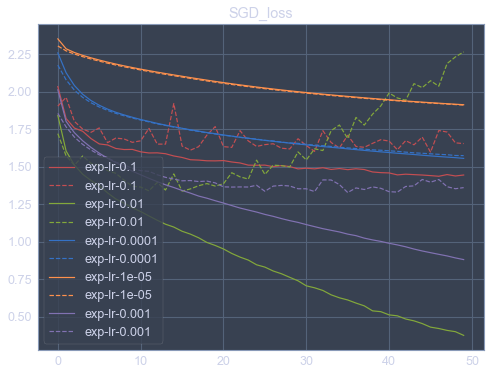

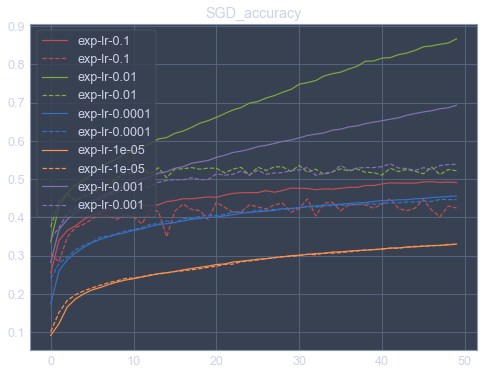

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("SGD_loss")
plt.legend()
plt.show()
fig.savefig("SGD_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("SGD_accuracy")
plt.legend()
plt.show()
fig.savefig("SGD_acc.png", bbox_inches='tight', dpi=300)


In [16]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.Adagrad(lr = lr, epsilon = None, decay = 0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/step - loss: 14.4465 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063

50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 2s 43us/step - loss: 1.4564 - acc: 0.4898 - val_loss: 1.4955 - val_acc: 0.4665
Epoch 17/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4457 - acc: 0.4934 - val_loss: 1.4815 - val_acc: 0.4715
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4367 - acc: 0.4959 - val_loss: 1.4816 - val_acc: 0.4752
Epoch 19/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4283 - acc: 0.5005 - val_loss: 1.5133 - val_acc: 0.4639
Epoch 20/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4204 - acc: 0.5027 - val_loss: 1.4876 - val_acc: 0.4657
Epoch 21/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4115 - acc: 0.5055 - val_loss: 1.4683 - val_acc: 0.4797
Epoch 22/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4038 - acc: 0.5088 - val_loss: 1.4773 - val_acc: 0.4746
Epoch 23/50
50000/50000 [=====================

Epoch 25/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7144 - acc: 0.4064 - val_loss: 1.7215 - val_acc: 0.4043
Epoch 26/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7107 - acc: 0.4066 - val_loss: 1.7179 - val_acc: 0.4064
Epoch 27/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7072 - acc: 0.4084 - val_loss: 1.7140 - val_acc: 0.4053
Epoch 28/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7036 - acc: 0.4111 - val_loss: 1.7117 - val_acc: 0.4097
Epoch 29/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7004 - acc: 0.4124 - val_loss: 1.7083 - val_acc: 0.4085
Epoch 30/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6973 - acc: 0.4124 - val_loss: 1.7057 - val_acc: 0.4104
Epoch 31/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6941 - acc: 0.4139 - val_loss: 1.7017 - val_acc: 0.4110
Epoch 32/50
50000/50000 [=========

Epoch 34/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.0169 - acc: 0.3153 - val_loss: 2.0157 - val_acc: 0.3187
Epoch 35/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0145 - acc: 0.3158 - val_loss: 2.0134 - val_acc: 0.3202
Epoch 36/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0123 - acc: 0.3164 - val_loss: 2.0112 - val_acc: 0.3220
Epoch 37/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0100 - acc: 0.3175 - val_loss: 2.0090 - val_acc: 0.3217
Epoch 38/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.0079 - acc: 0.3178 - val_loss: 2.0069 - val_acc: 0.3229
Epoch 39/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0058 - acc: 0.3184 - val_loss: 2.0049 - val_acc: 0.3234
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0037 - acc: 0.3190 - val_loss: 2.0029 - val_acc: 0.3245
Epoch 41/50
50000/50000 [=========

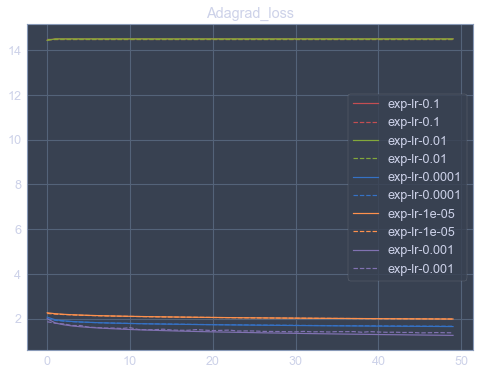

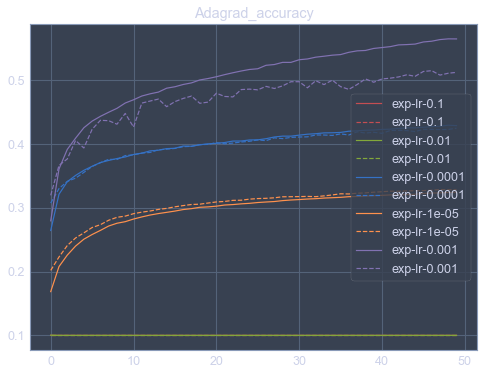

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad_loss")
plt.legend()
plt.show()
fig.savefig("Adagrad_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad_accuracy")
plt.legend()
plt.show()
fig.savefig("Adagrad_acc.png", bbox_inches='tight', dpi=300)

In [19]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.RMSprop(lr = lr, rho = 0.9, epsilon = None, decay = 0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.4452 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063

50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 2s 44us/step - loss: 1.3312 - acc: 0.5260 - val_loss: 1.6142 - val_acc: 0.4480
Epoch 17/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.3067 - acc: 0.5327 - val_loss: 1.5341 - val_acc: 0.4547
Epoch 18/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2938 - acc: 0.5379 - val_loss: 1.4900 - val_acc: 0.4776
Epoch 19/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.2727 - acc: 0.5453 - val_loss: 1.4401 - val_acc: 0.4969
Epoch 20/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2548 - acc: 0.5513 - val_loss: 1.5151 - val_acc: 0.4760
Epoch 21/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2371 - acc: 0.5588 - val_loss: 1.4274 - val_acc: 0.5055
Epoch 22/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2131 - acc: 0.5656 - val_loss: 1.6445 - val_acc: 0.4432
Epoch 23/50
50000/50000 [=====================

Epoch 25/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2140 - acc: 0.5753 - val_loss: 1.4604 - val_acc: 0.4855
Epoch 26/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2051 - acc: 0.5763 - val_loss: 1.3702 - val_acc: 0.5149
Epoch 27/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1918 - acc: 0.5824 - val_loss: 1.4446 - val_acc: 0.4862
Epoch 28/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1798 - acc: 0.5879 - val_loss: 1.4702 - val_acc: 0.4801
Epoch 29/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1672 - acc: 0.5909 - val_loss: 1.3859 - val_acc: 0.5124
Epoch 30/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1571 - acc: 0.5965 - val_loss: 1.4393 - val_acc: 0.4900
Epoch 31/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1426 - acc: 0.6013 - val_loss: 1.3647 - val_acc: 0.5201
Epoch 32/50
50000/50000 [=========

Epoch 34/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4791 - acc: 0.4862 - val_loss: 1.5247 - val_acc: 0.4625
Epoch 35/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4732 - acc: 0.4889 - val_loss: 1.5224 - val_acc: 0.4652
Epoch 36/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4684 - acc: 0.4895 - val_loss: 1.5158 - val_acc: 0.4658
Epoch 37/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4623 - acc: 0.4927 - val_loss: 1.5196 - val_acc: 0.4646
Epoch 38/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4578 - acc: 0.4925 - val_loss: 1.5005 - val_acc: 0.4682
Epoch 39/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4525 - acc: 0.4961 - val_loss: 1.4965 - val_acc: 0.4708
Epoch 40/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4474 - acc: 0.4963 - val_loss: 1.5144 - val_acc: 0.4622
Epoch 41/50
50000/50000 [=========

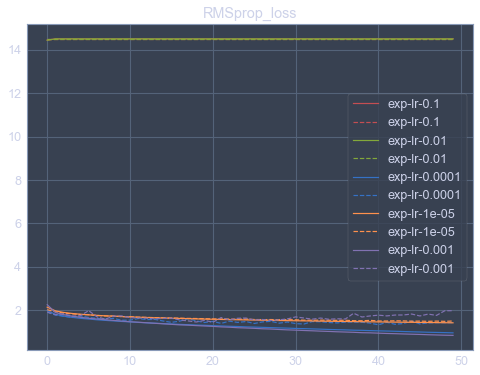

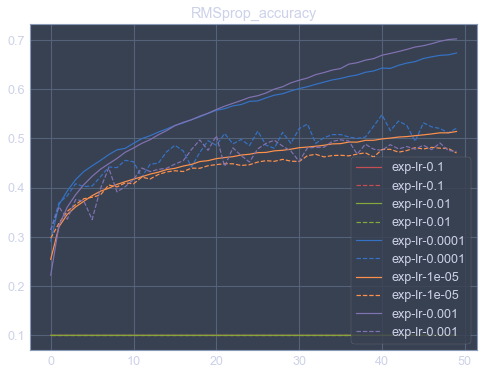

In [20]:
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop_loss")
plt.legend()
plt.show()
fig.savefig("RMSprop_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop_accuracy")
plt.legend()
plt.show()
fig.savefig("RMSprop_acc.png", bbox_inches='tight', dpi=300)

In [21]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.Adam(lr = lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.4418 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063

50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 2s 46us/step - loss: 1.2132 - acc: 0.5686 - val_loss: 1.3919 - val_acc: 0.5173
Epoch 17/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1902 - acc: 0.5766 - val_loss: 1.3879 - val_acc: 0.5105
Epoch 18/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1768 - acc: 0.5789 - val_loss: 1.3925 - val_acc: 0.5057
Epoch 19/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1623 - acc: 0.5842 - val_loss: 1.3858 - val_acc: 0.5137
Epoch 20/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1394 - acc: 0.5937 - val_loss: 1.3790 - val_acc: 0.5173
Epoch 21/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1205 - acc: 0.6021 - val_loss: 1.3804 - val_acc: 0.5164
Epoch 22/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0913 - acc: 0.6081 - val_loss: 1.3692 - val_acc: 0.5205
Epoch 23/50
50000/50000 [=====================

Epoch 25/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1220 - acc: 0.6101 - val_loss: 1.3382 - val_acc: 0.5289
Epoch 26/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.1058 - acc: 0.6167 - val_loss: 1.3331 - val_acc: 0.5308
Epoch 27/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0838 - acc: 0.6222 - val_loss: 1.3742 - val_acc: 0.5195
Epoch 28/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0804 - acc: 0.6242 - val_loss: 1.3876 - val_acc: 0.5132
Epoch 29/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.0710 - acc: 0.6269 - val_loss: 1.3359 - val_acc: 0.5283
Epoch 30/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.0492 - acc: 0.6358 - val_loss: 1.3358 - val_acc: 0.5315
Epoch 31/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0368 - acc: 0.6404 - val_loss: 1.3086 - val_acc: 0.5404
Epoch 32/50
50000/50000 [=========

Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.4527 - acc: 0.4977 - val_loss: 1.4902 - val_acc: 0.4767
Epoch 35/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4460 - acc: 0.4992 - val_loss: 1.4895 - val_acc: 0.4726
Epoch 36/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4396 - acc: 0.5035 - val_loss: 1.4829 - val_acc: 0.4814
Epoch 37/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4357 - acc: 0.5049 - val_loss: 1.4817 - val_acc: 0.4807
Epoch 38/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4288 - acc: 0.5060 - val_loss: 1.4738 - val_acc: 0.4829
Epoch 39/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4235 - acc: 0.5081 - val_loss: 1.4725 - val_acc: 0.4836
Epoch 40/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4192 - acc: 0.5112 - val_loss: 1.4662 - val_acc: 0.4836
Epoch 41/50
50000/50000 [=========

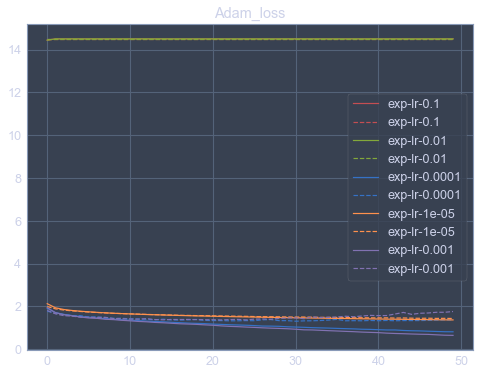

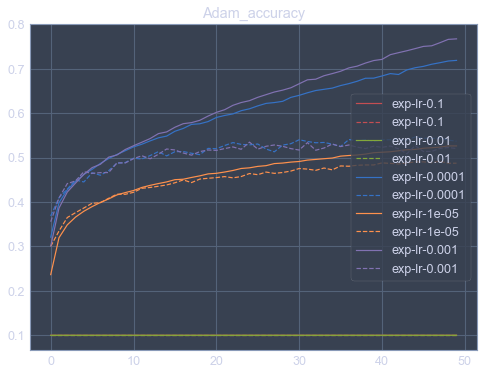

In [22]:
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adam_loss")
plt.legend()
plt.show()
fig.savefig("Adam_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adam_accuracy")
plt.legend()
plt.show()
fig.savefig("Adam_acc.png", bbox_inches='tight', dpi=300)